# Das Bisherige mit Hilfe des neuen Moduls `mlpexps`

loading module mlpexps.py
preparing data ...
creating model ...
training model ...
	testing model on train data ...
	testing model on test data ...
Epoch 5: train MAPE=87.62, test MAPE = 87.57
	testing model on train data ...
	testing model on test data ...
Epoch 10: train MAPE=82.68, test MAPE = 82.50
	testing model on train data ...
	testing model on test data ...
Epoch 15: train MAPE=69.44, test MAPE = 69.04
	testing model on train data ...
	testing model on test data ...
Epoch 20: train MAPE=51.20, test MAPE = 51.20
	testing model on train data ...
	testing model on test data ...
Epoch 25: train MAPE=41.60, test MAPE = 41.39
	testing model on train data ...
	testing model on test data ...
Epoch 30: train MAPE=37.02, test MAPE = 36.89
	testing model on train data ...
	testing model on test data ...
Epoch 35: train MAPE=32.85, test MAPE = 33.14
	testing model on train data ...
	testing model on test data ...
Epoch 40: train MAPE=26.90, test MAPE = 27.26
	testing model on train data .

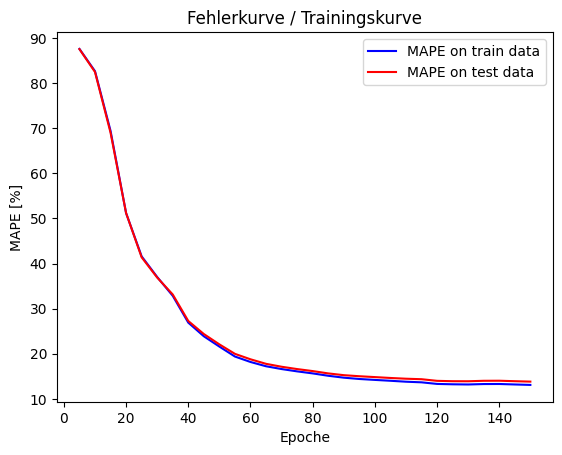

In [1]:
# 1. Datensatz einlesen und fürs ML vorbereiten
import mlpexps
fname = "data_cars_cleaned.csv"
list_target_cols = ["price_in_euro"]
x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor, scaler_input, scaler_output = \
    mlpexps.prepare_data(fname, list_target_cols)

# 2. Ein MLP Modell erstellen
input_dim = x_train_tensor.shape[1]
output_dim = y_train_tensor.shape[1]
model = mlpexps.create_model(input_dim, output_dim)

# 3. Das MLP trainieren und testen
mlpexps.train_and_test_MLP(150, model, x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor, scaler_output)

# `dropout` als Gegenmechanismus zum Overfitting